In [1]:
from PIL import Image, ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

In [2]:
import numpy as np
import cv2
import math
from scipy import ndimage
import matplotlib.pyplot as plt

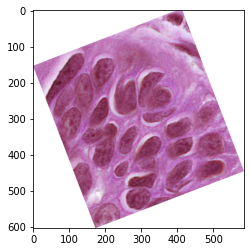

In [12]:
img_before = cv2.imread('cropped.png')
plt.imshow(img_before)

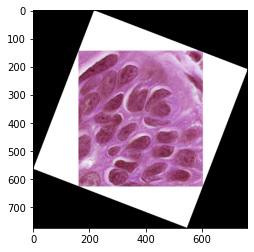

In [13]:
img_rotated = ndimage.rotate(img_before,-21)
plt.imshow(img_rotated)

In [14]:
img_rotated = cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB)
img_rotated = Image.fromarray(img_rotated)
img_rotated.save("rotated.png")

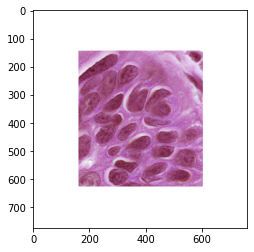

In [5]:
# get (i, j) positions of all RGB pixels that are black (i.e. [0, 0, 0])
black_pixels = np.where(
    (img_rotated[:, :, 0] == 0) & 
    (img_rotated[:, :, 1] == 0) & 
    (img_rotated[:, :, 2] == 0)
)

# set those pixels to white
img_rotated[black_pixels] = [255, 255, 255]
plt.imshow(img_rotated)

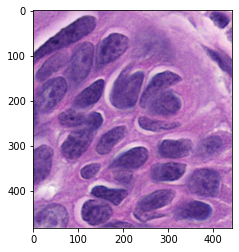

In [6]:
img_rotated = cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB)
im = Image.fromarray(img_rotated)
im2 = trim(im)
plt.imshow(im2)

In [7]:
im2.save("final.png")